![ga4](https://www.google-analytics.com/collect?v=2&tid=G-6VDTYWLKX6&cid=1&en=page_view&sid=1&dl=statmike%2Fvertex-ai-mlops%2FWorking+With%2FDocument+AI&dt=Document+AI+Processors+-+OCR+Parser+With+Math+Type.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Working%20With/Document%20AI/Document%20AI%20Processors%20-%20OCR%20Parser%20With%20Math%20Type.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A//raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Working%20With/Document%20AI/Document%20AI%20Processors%20-%20OCR%20Parser%20With%20Math%20Type.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Working%20With/Document%20AI/Document%20AI%20Processors%20-%20OCR%20Parser%20With%20Math%20Type.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https%3A//raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Working%20With/Document%20AI/Document%20AI%20Processors%20-%20OCR%20Parser%20With%20Math%20Type.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# Document AI Processors - OCR Parser With Math Type
> From the [Working With Document AI](https://github.com/statmike/vertex-ai-mlops/blob/main/Working%20With/Document%20AI/readme.md) series in the [vertex-ai-mlops](https://github.com/statmike/vertex-ai-mlops/blob/main/readme.md) repository.

Document AI is an API where you interact with processors to extract information from documents.  You enable the API, create an instance of a processor in your project, send in document(s), receive back JSON with the extracted information:

<p align="center" width="100%"><center>
    <img src="../../architectures/architectures/images/working with/documentai/readme/high_level.png">
</center></p>

This notebook uses the [OCR parser](https://cloud.google.com/document-ai/docs/enterprise-document-ocr) which has optional [add ons](https://cloud.google.com/document-ai/docs/process-documents-ocr#ocr_add_ons) like the [Math OCR](https://cloud.google.com/document-ai/docs/process-documents-ocr#math_ocr) which is highlighted in this workflow.

---

**Processing**

A prior workflow covered all the ways to process a document, or many documents, using Python as the client: [Document AI - Process Documents](./Document%20AI%20-%20Process%20Documents.ipynb). It also shows how to store and retrieve responses from GCS and BigQuery.

---

**Responses**

There are many ways to process the responses from Document AI to extract the parts needed for a downstream applicaiton: paragraphs, tokens, entities, tables, much more!  The choice will depend on the application workflow and if a single document is being processed, a batch of documents, or an entire history of documents is being processed.  A prior workflow covered three common ways to process responses:
[Document AI - Process Responses](./Document%20AI%20-%20Process%20Responses.ipynb)
- Extraction: Python With Document AI Client
- Extraction: Python With Document AI Toolbox
- Extraction: Directly In BigQuery With SQL

>Beyond the [OCR parser](https://cloud.google.com/document-ai/docs/enterprise-document-ocr), used in this notebook, [other parsers](https://cloud.google.com/document-ai/docs/processors-list) save the unique entities they extract into an [aiplatform.Document.Entity()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document) object.

---

**References:**
- [Python Client For Document AI](https://cloud.google.com/python/docs/reference/documentai/latest)
    - [documentai.Document()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document)
- [Document AI Overview](https://cloud.google.com/document-ai/docs/overview)
    - [Handling the processing response](https://cloud.google.com/document-ai/docs/handle-response)

---
## Colab Setup

To run this notebook in Colab click [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Working%20With/Document%20AI/Document%20AI%20Processors%20-%20OCR%20Parser%20With%20Math%20Type.ipynb) and run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup).

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [2]:
try:
    import google.colab
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

---
## Installs and API Enablement

The clients packages may need installing in this environment. 

### Installs (If Needed)

In [9]:
# tuples of (import name, install name)
packages = [
    ('google.cloud.documentai', 'google-cloud-documentai'),
    ('PIL', 'Pillow'),
    ('PyPDF2', 'PyPDF2')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user

### API Enablement

In [4]:
!gcloud services enable documentai.googleapis.com

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [10]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

---
## Setup

Inputs

In [11]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [12]:
REGION = 'us-central1'
SERIES = 'working-with-docai'
EXPERIMENT = 'math-type'

Packages

In [13]:
import os, io, json

import PyPDF2
import IPython
import PIL, PIL.ImageFont, PIL.Image, PIL.ImageDraw

from google.cloud import documentai

Clients

In [14]:
# document AI client
LOCATION = REGION.split('-')[0]
docai = documentai.DocumentProcessorServiceClient(
    client_options = dict(api_endpoint = f"{LOCATION}-documentai.googleapis.com")
)

---
## Get The Document

This section prepares a document for processing with online processing.

|Document Name|Link|
|---|---|
|`../shared files/docs/Bayes' theorem - Wikipedia.pdf`|[https://en.wikipedia.org/wiki/Bayes%27_theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)|

If you are working from a clone of this notebooks repository then the document is already present. The following cell checks for the documents folder, `../shared_files/docs`, and if it is missing gets the document used in this workflow (`wget`):

In [18]:
file = "../shared files/docs/Bayes' theorem - Wikipedia.pdf"
if not os.path.exists(file):
    print('Retrieving document...')
    if not os.path.exists(os.path.dirname(file)):
      os.makedirs(os.path.dirname(file))
    import requests, urllib.parse
    r = requests.get(f'https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Working%20With/{urllib.parse.quote(file[3:])}')
    open(file, 'wb').write(r.content)
    print(f'Document now at `{file}`')
else:
    print(f'Document Found at `{file}`')

Document Found at `../shared files/docs/Bayes' theorem - Wikipedia.pdf`


---
## Create/Get A Processor

For this workflow we will use the [OCR parser](https://cloud.google.com/document-ai/docs/processors-list#processor_doc-ocr). We can check for an existing processor in the project that the OCR Parser with desired version and if it is not present then create one.  The processor will be connected with Python variable `PARSER` and referred to as a parser as it is used.

Get the type and version from the list of available processors: https://cloud.google.com/document-ai/docs/processors-list

What are the processors already created in this project environment?

In [19]:
processors = list(docai.list_processors(parent = f'projects/{PROJECT_ID}/locations/{LOCATION}'))
len(processors)

4

In [20]:
TYPE = 'OCR_PROCESSOR'
VERSION = 'pretrained-ocr-v2.0-2023-06-02'

Get an existing processor:

In [21]:
PARSER = ''
for processor in processors:
    if processor.type_ == TYPE and processor.default_processor_version.split('/')[-1] == VERSION:
        PARSER = processor
        break
        
if PARSER:
    print(f'There is an existing processor with the desire type and version in PARSER = {PARSER.display_name}')
else:
    print(f'Need to create a processor for the desired type and version: {TYPE}, {VERSION}')

There is an existing processor with the desire type and version in PARSER = working-with-docai


Create the processor if an existing one was not found to match:

In [22]:
if not PARSER:
    PARSER = docai.create_processor(
        parent = f'projects/{PROJECT_ID}/locations/{LOCATION}',
        processor = documentai.Processor(
            display_name = SERIES,
            type_ = TYPE
        )
    )
    set_default = docai.set_default_processor_version(
        request = documentai.SetDefaultProcessorVersionRequest(
            processor = PARSER.name,
            default_processor_version = f'{PARSER.name}/processorVersions/{VERSION}'
        )
    )
    set_default.result()
    PARSER = docai.get_processor(
        name = PARSER.name
    )
    print(f'Processor created and in PARSER variable with display name = {PARSER.display_name}')

---
## Online Processing (single document)

> A prior workflow covered all the ways to process a document, or many documents, using Python as the client: [Document AI - Process Documents](./Document%20AI%20-%20Process%20Documents.ipynb). It also shows how to store and retrieve responses from GCS and BigQuery.

This section uses one of the three online processing methods: `inline_document` where the document is provided as a bytes object.

> NOTE: The [OCR Processor](https://cloud.google.com/document-ai/docs/processors-list#processor_doc-ocr) has pages limits of 15 for online, and 500 for batch processing.

The following is the Python client reference to use for this online processing section:
- [google.cloud.documentai.DocumentProcessorServiceClient.process_document()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.services.document_processor_service.DocumentProcessorServiceClient#google_cloud_documentai_v1_services_document_processor_service_DocumentProcessorServiceClient_process_document)

Using the processor stored in `PARSER` from above:

In [23]:
PARSER.name

'projects/1026793852137/locations/us/processors/d59e19cc08278630'

### Read the document to a bytes object:

In [24]:
with open(file, 'rb') as f:
    local_doc = f.read()

In [25]:
type(local_doc)

bytes

### How many pages are in the document?

In [26]:
with open(file, 'rb') as pdf:
    doc = pdf.read()
reader = PyPDF2.PdfReader(io.BytesIO(doc))
num_pages = len(reader.pages)
num_pages

17

>For the OCR Parser there is a maximum number of pages of 15 for online processing.  Check out the section "Online Async: Multiple Parts Of Same Document" in the workflow [Document AI - Process Documents](./Document%20AI%20-%20Process%20Documents.ipynb) for a method to parse the full document is sections using online processing.  Here, the first 5 pages will be used for example.

### Document as bytes: `inline_document`

To detect math type with the OCR parser the add on feature needs to be enabled.  Note the inclusion of this in the online requst below: 

```
premium_features = documentai.OcrConfig.PremiumFeatures(
    compute_style_info = True,
    enable_math_ocr = True
)
```

Reference:
- [documentai.ProcessRequest()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.ProcessRequest)
    - (This One) `inline_document` = [documentai.Document()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document)
    - `raw_document` = [documentai.RawDocument()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.RawDocument)
    - `gcs_document` = [documentai.GcsDocument()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.GcsDocument)

In [81]:
response = docai.process_document(
    request = documentai.ProcessRequest(
        name = PARSER.name,
        inline_document = documentai.Document(
            content = local_doc,
            mime_type = 'application/pdf'
        ),
        process_options = documentai.ProcessOptions(
            from_start = 5,
            ocr_config = documentai.OcrConfig(
                enable_symbol = True,
                enable_image_quality_scores = True,
                premium_features = documentai.OcrConfig.PremiumFeatures(
                    enable_math_ocr = True
                )
            )
        )
    )
)

In [82]:
len(response.document.pages)

5

In [83]:
print(response.document.text[0:250])

10/27/23, 9:20 AM
Ω
WIKIPEDIA
The Free Encyclopedia
Toggle the table of contents
Bayes' theorem
Bayes
' 
theorem - Wikipedia
In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after
Thomas Bayes, des


---
## Extraction Methods

Below, the Python Client for Document AI is used to extract the parts of the OCR response.  There are other methods that could be better for different application flows.  The workflow [Document AI - Process Responses](./Document%20AI%20-%20Process%20Responses.ipynb) covers additional methods.
- Extraction: Python With Document AI Client
- Extraction: Python With Document AI Toolbox
- Extraction: Directly In BigQuery With SQL

---
## Extraction: Python With Document AI Client

The response from online processing is a [`documentai.ProcessResponse()`](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.ProcessResponse) which has a `document` attribute that is a [`documentai.Document()`](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document) protobuf.  This object can be directly used to extract elements of the document.  It can also be converted to other data types that can be iterated in Python:
- JSON with `response.document.to_json()`
- Dictionary with `response.document.to_dict()`
- > Note: These follow the `google.protobuf.json_format` - [reference](https://googleapis.dev/python/protobuf/latest/google/protobuf/json_format.html).  That means the parameters of `.to_dict()` are the same as `google.protobuf.json_format.MessageToDict()` which includes `use_integer_for_enums` which should be set `= False` to get the text representation of enum values.

The workflow has a helpful guide to the structure of the `documentai.Document` object in the [readme.md](./readme.md).

In [84]:
response.document.mime_type

'application/pdf'

### OCR Text: document.text

In [85]:
print(response.document.text[0:500])

10/27/23, 9:20 AM
Ω
WIKIPEDIA
The Free Encyclopedia
Toggle the table of contents
Bayes' theorem
Bayes
' 
theorem - Wikipedia
In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after
Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to
the event.[1] For example, if the risk of developing health problems is known to increase with age, Bayes' theorem
allows the risk to an individual of


### Pages

`response.document.pages` = list of [documentai.Document.Page](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page)

How many pages?

In [86]:
len(response.document.pages)

5

Pick a single page, the first one:

In [87]:
page = response.document.pages[1]

In [88]:
page.page_number

2

What are the physical characteristics of the page? Layout and size (in pixels)?
- [documentai.Document.Page.Dimension()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.Dimension)
- [documentai.Document.Page.Layout()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.Layout)

In [89]:
page.dimension

width: 1758.0
height: 2275.0
unit: "pixels"

In [90]:
page.layout

text_anchor {
  text_segments {
    start_index: 3743
    end_index: 5485
  }
}
confidence: 0.9396263360977173
bounding_poly {
  vertices {
  }
  vertices {
    x: 1758
  }
  vertices {
    x: 1758
    y: 2275
  }
  vertices {
    y: 2275
  }
  normalized_vertices {
  }
  normalized_vertices {
    x: 1.0
  }
  normalized_vertices {
    x: 1.0
    y: 1.0
  }
  normalized_vertices {
    y: 1.0
  }
}
orientation: PAGE_UP

What languages are used within the pages text?
- [documenai.Document.Page.DetectedLanguage()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.DetectedLanguage)

In [91]:
page.detected_languages

[language_code: "en"
confidence: 0.9578341841697693
]

What is the text on the page?

Use the pages `text_anchor` and `text_segments` list to get the range of characters from `response.document.text` that contain the pages text.  When the `start_index` is missing from `text_anchor` is means start at 0.

In [92]:
print(response.document.text[0:page.layout.text_anchor.text_segments[0].end_index])

10/27/23, 9:20 AM
Ω
WIKIPEDIA
The Free Encyclopedia
Toggle the table of contents
Bayes' theorem
Bayes
' 
theorem - Wikipedia
In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after
Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to
the event.[1] For example, if the risk of developing health problems is known to increase with age, Bayes' theorem
allows the risk to an individual of a known age to be assessed more accurately by conditioning it relative to their age,
rather than simply assuming that the individual is typical of the population as a whole.
One of the many applications of Bayes' theorem is Bayesian inference, a particular approach to statistical inference.
When applied, the probabilities involved in the theorem may have different probability interpretations. With Bayesian
probability interpretation, the theorem expresses how a degree of belief, expressed as a 

What does the page look like?
- [documentai.Document.Page.Image()](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.Image)

In [93]:
page.image.width, page.image.height, page.image.mime_type

(1758, 2275, 'image/png')

In [94]:
type(page.image.content)

bytes

In [95]:
image = PIL.Image.open(io.BytesIO(page.image.content))

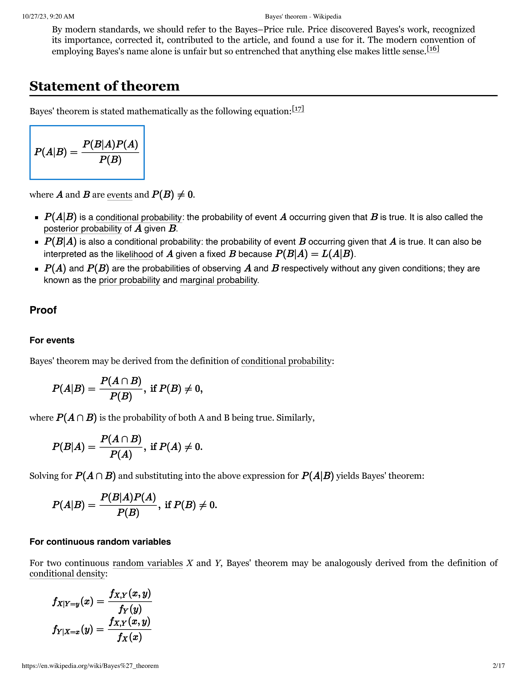

In [96]:
IPython.display.display(
    image.resize(
        (int(.3 * page.image.width), int(.3 * page.image.height))
    )
)

What is the quality of the pages image?
- [documentai.Document.Page.ImageQualityScores](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.ImageQualityScores)

In [97]:
page.image_quality_scores

quality_score: 0.9387601613998413
detected_defects {
  type_: "quality/defect_document_cutoff"
  confidence: 1.0
}
detected_defects {
  type_: "quality/defect_glare"
  confidence: 0.6258635520935059
}
detected_defects {
  type_: "quality/defect_text_cutoff"
  confidence: 0.5
}

In [98]:
page.detected_barcodes

[]

In [99]:
page.tables

[]

In [100]:
page.form_fields

[]

### Python Helper Function

For extracting components from a page: blocks, paragraphs, lines, tokens, symbols

A simple function to extract a given component (block, paragraph, line, token, symbol) from a page:

In [101]:
def extractor(component):
    
    components = []
    
    for part in component:
        components.append(
            "".join(
                [
                    response.document.text[segment.start_index:segment.end_index] for segment in part.layout.text_anchor.text_segments
                ]
            )
        )
    
    return components

A simple function to annotate a given component (block, paragraph, line, token, symbol) from a page on the page image:

In [117]:
def annotator(image, component, line_size = 5):
    
    annotated_image = image.copy()
    draw = PIL.ImageDraw.Draw(annotated_image)
    
    for part in component:
        if len(part.layout.bounding_poly.normalized_vertices) > 2:
            draw.polygon(
                [(v.x * page.image.width, v.y * page.image.height) for v in part.layout.bounding_poly.normalized_vertices],
                outline = 'green',
                width = line_size
            )
    
    IPython.display.display(annotated_image)
    
    return

### Pages:Visual Elements

Some elements on the page are deteced as non-text like checkboxes, signatures, and math formulas. Some formulas are inline with text and still OCR'd as tokens - see that section further down in this workflow.

- [documentai.Document.Page.VisualElement](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.VisualElement)

In [136]:
visual_elements = extractor(page.visual_elements)

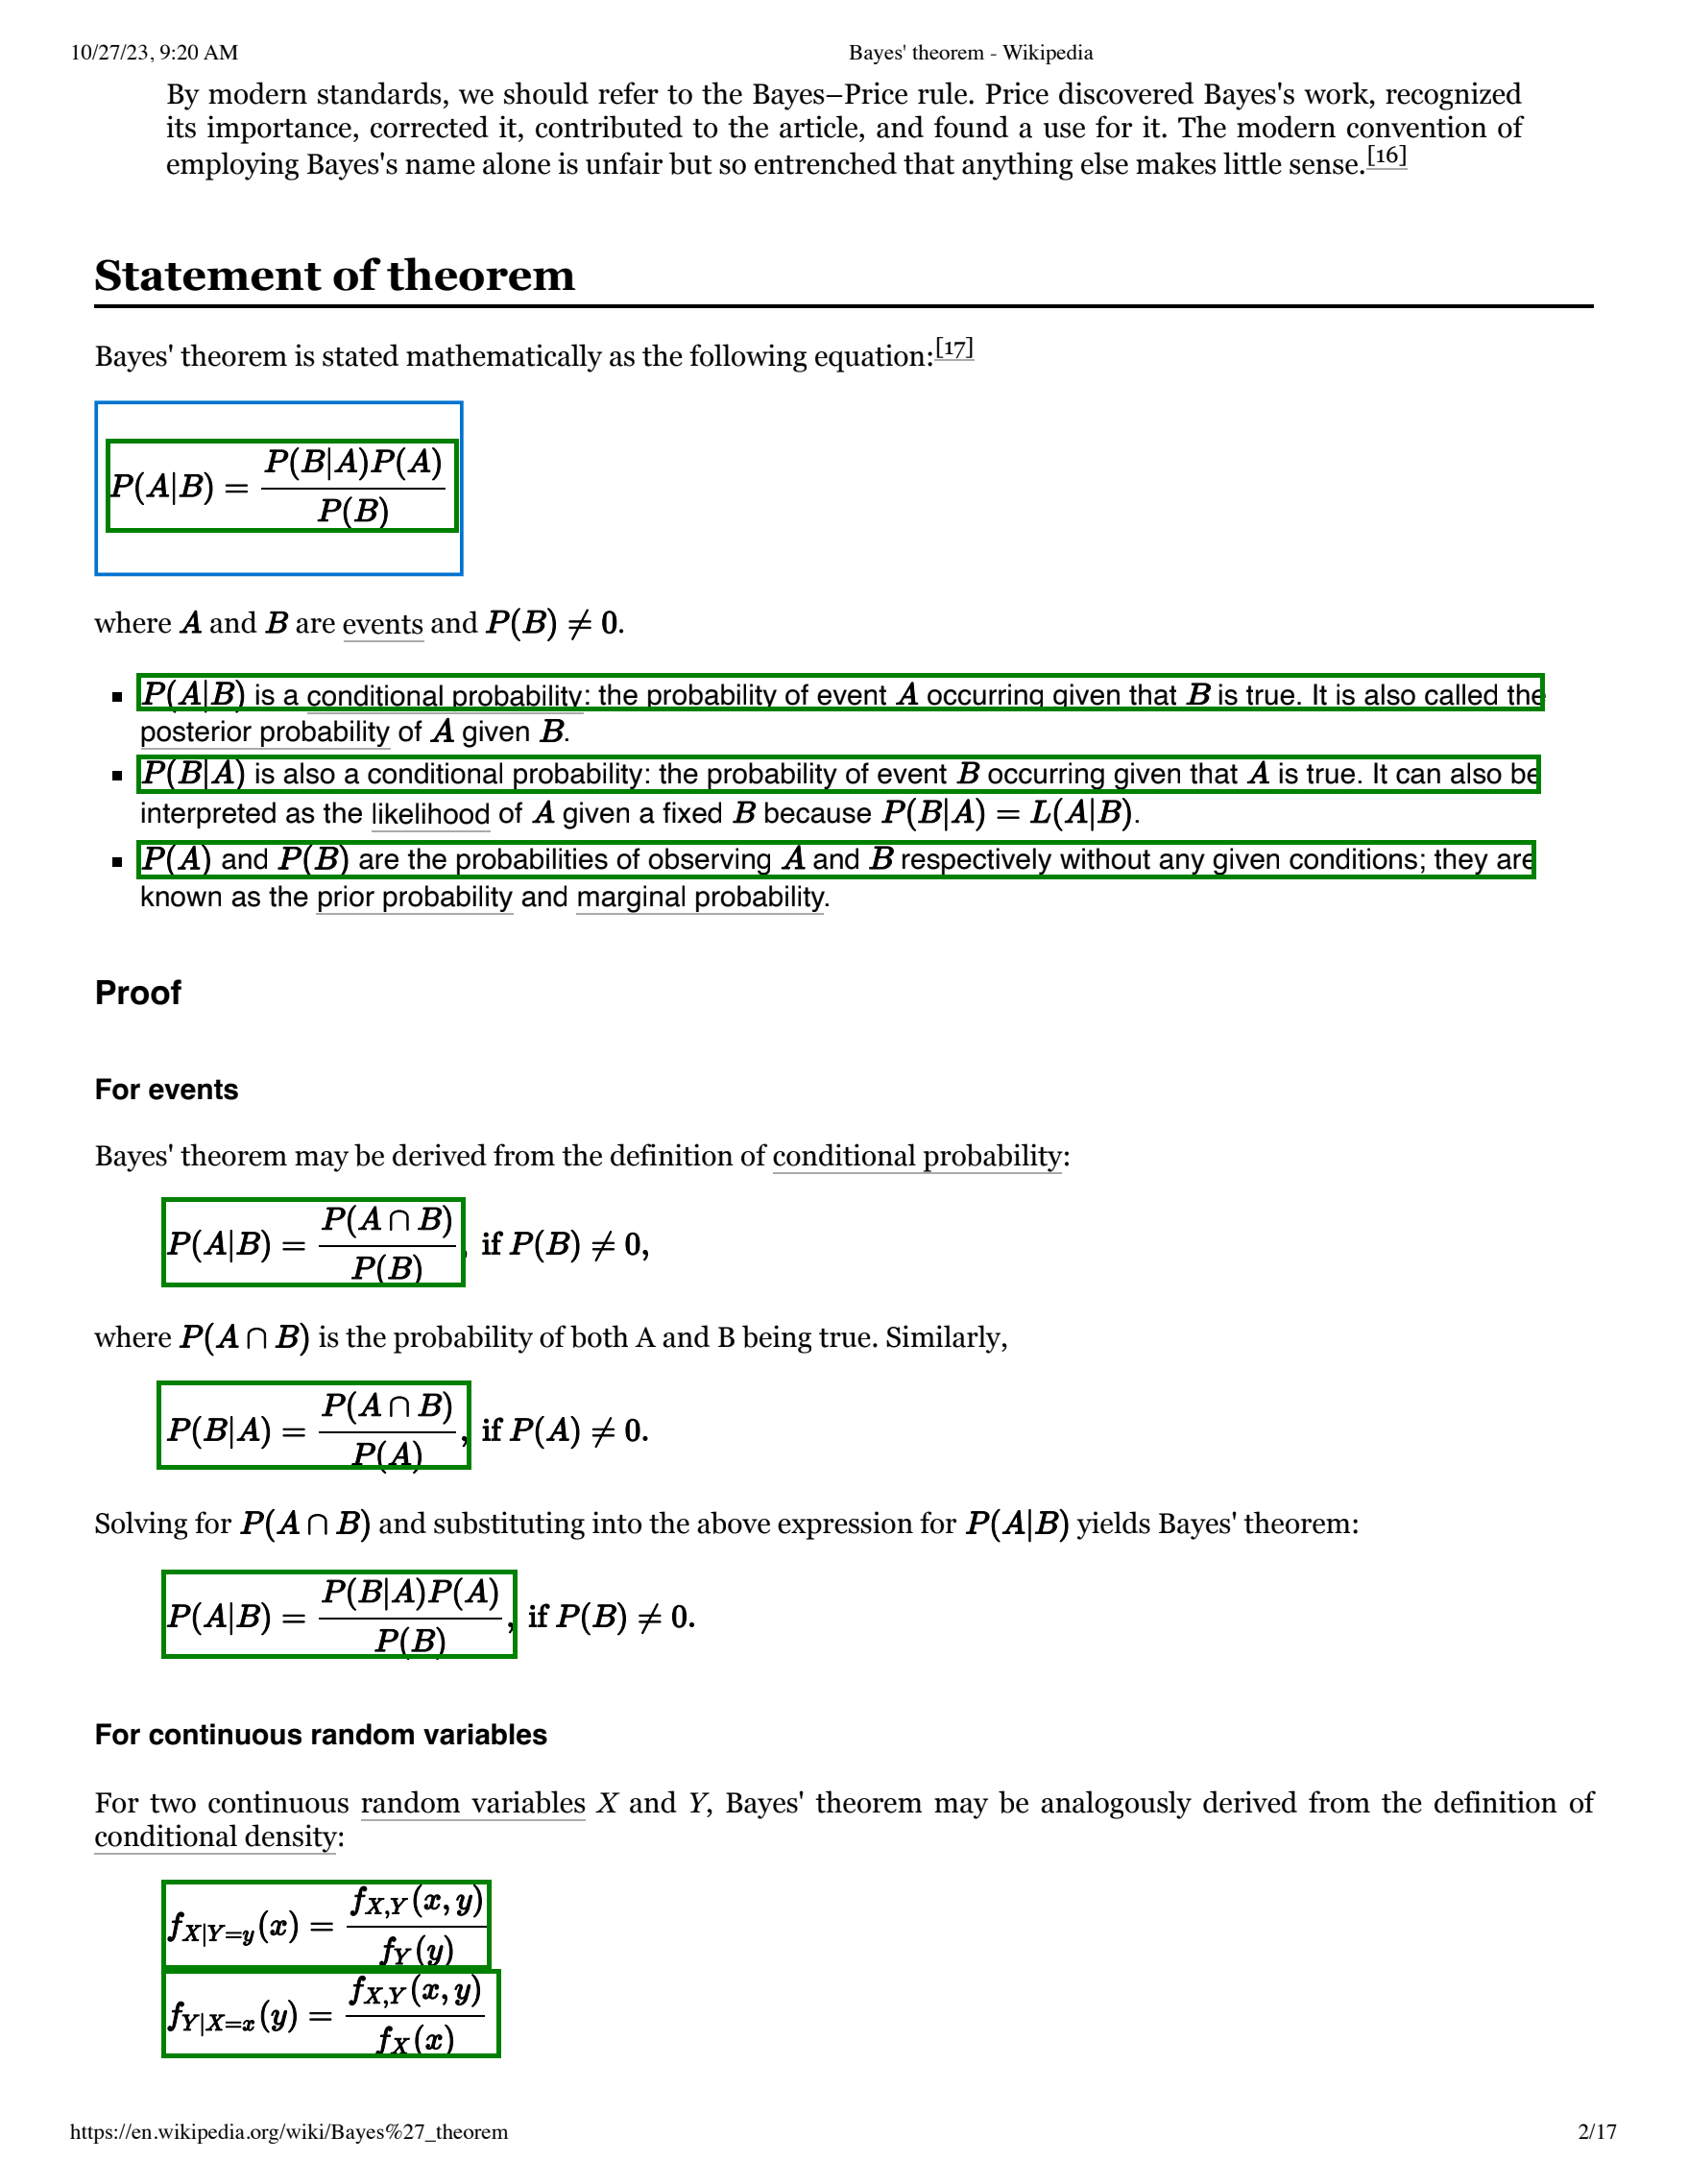

In [137]:
annotator(image, page.visual_elements)

In [138]:
for p, part in enumerate(visual_elements):
    print(f'{p} -------------------------------------------------------------------:\n{part}')

0 -------------------------------------------------------------------:
P(A|B)=\frac{P(B|A)P(A)}{P(B)}

1 -------------------------------------------------------------------:
P(A|B) is a conditional probability: the probability of event A occurring given that B is true. It is also called the

2 -------------------------------------------------------------------:
P(B|A) is also a conditional probability: the probability of event B occurring given that A is true. It can also be

3 -------------------------------------------------------------------:
P(A) and P(B) are the probabilities of observing A and B respectively without any given conditions; they are

4 -------------------------------------------------------------------:
P(A|B)=\frac{P(A\capB)}{P(B)},

5 -------------------------------------------------------------------:
P(B|A)=\frac{P(A\capB)}{P(A)},

6 -------------------------------------------------------------------:
P(A|B)=\frac{P(B|A)P(A)}{P(B)},

7 --------------------------

### OCR TO LaTeX

Note that the math type is converted to LaTeX in the OCR output.  For example, the first visual element above is extracted as:

```
P(A|B)=\frac{P(B|A)P(A)}{P(B)}
```

When included in LaTeX interpreter this presents as:

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

Which matches the original document visual presentation of the formula - my favorite actually!!

### Pages:Blocks

- [documentai.Document.Page.Block](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.Block)

In [118]:
blocks = extractor(page.blocks)

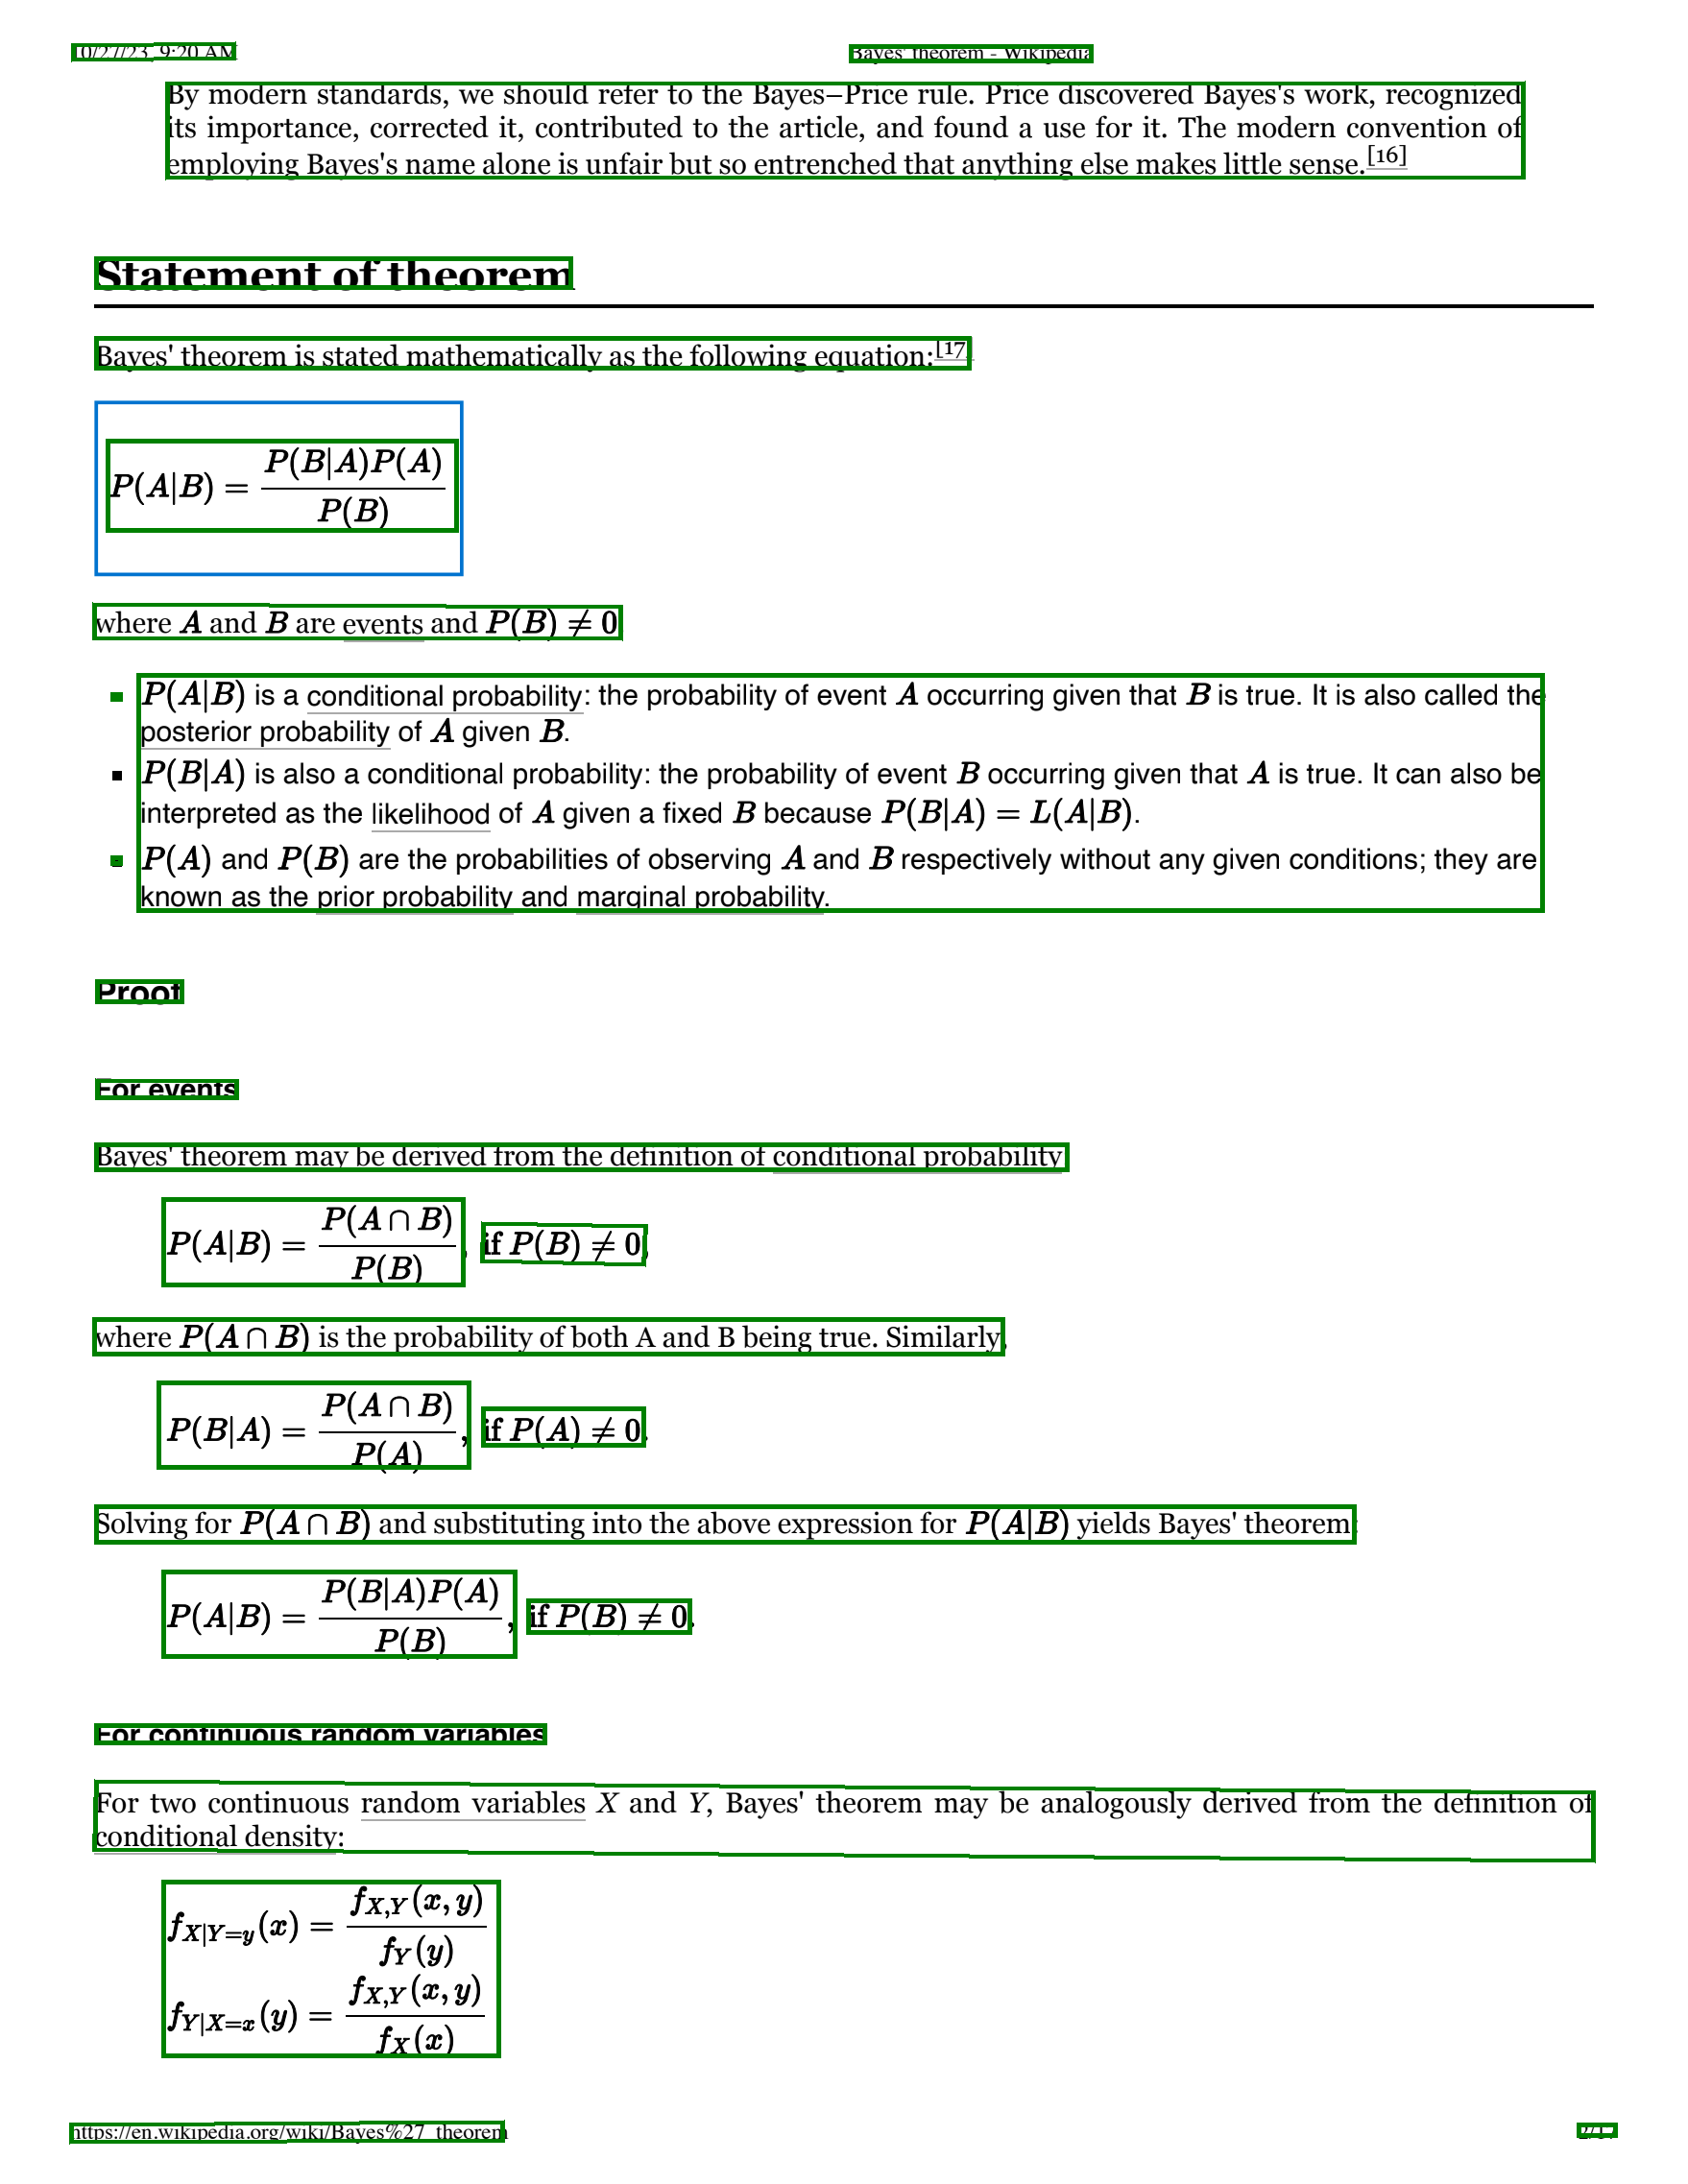

In [119]:
annotator(image, page.blocks)

In [120]:
for p, part in enumerate(blocks):
    print(f'{p} -------------------------------------------------------------------:\n{part}')

0 -------------------------------------------------------------------:
10/27/23, 9:20 AM

1 -------------------------------------------------------------------:
Bayes
' 
theorem - Wikipedia

2 -------------------------------------------------------------------:
By modern standards, we should refer to the Bayes-Price rule. Price discovered Bayes's work, recognized
its importance, corrected it, contributed to the article, and found a use for it. The modern convention of
employing Bayes's name alone is unfair but so entrenched that anything else makes little sense. [16]

3 -------------------------------------------------------------------:
Statement of theorem

4 -------------------------------------------------------------------:
Bayes' theorem is stated mathematically as the following equation:[17]

5 -------------------------------------------------------------------:
P(A|B)=\frac{P(B|A)P(A)}{P(B)}

6 -------------------------------------------------------------------:
where A and B a

### Pages:Paragraphs

- [documentai.Document.Page.Paragraph](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.Paragraph)

In [121]:
paragraphs = extractor(page.paragraphs)

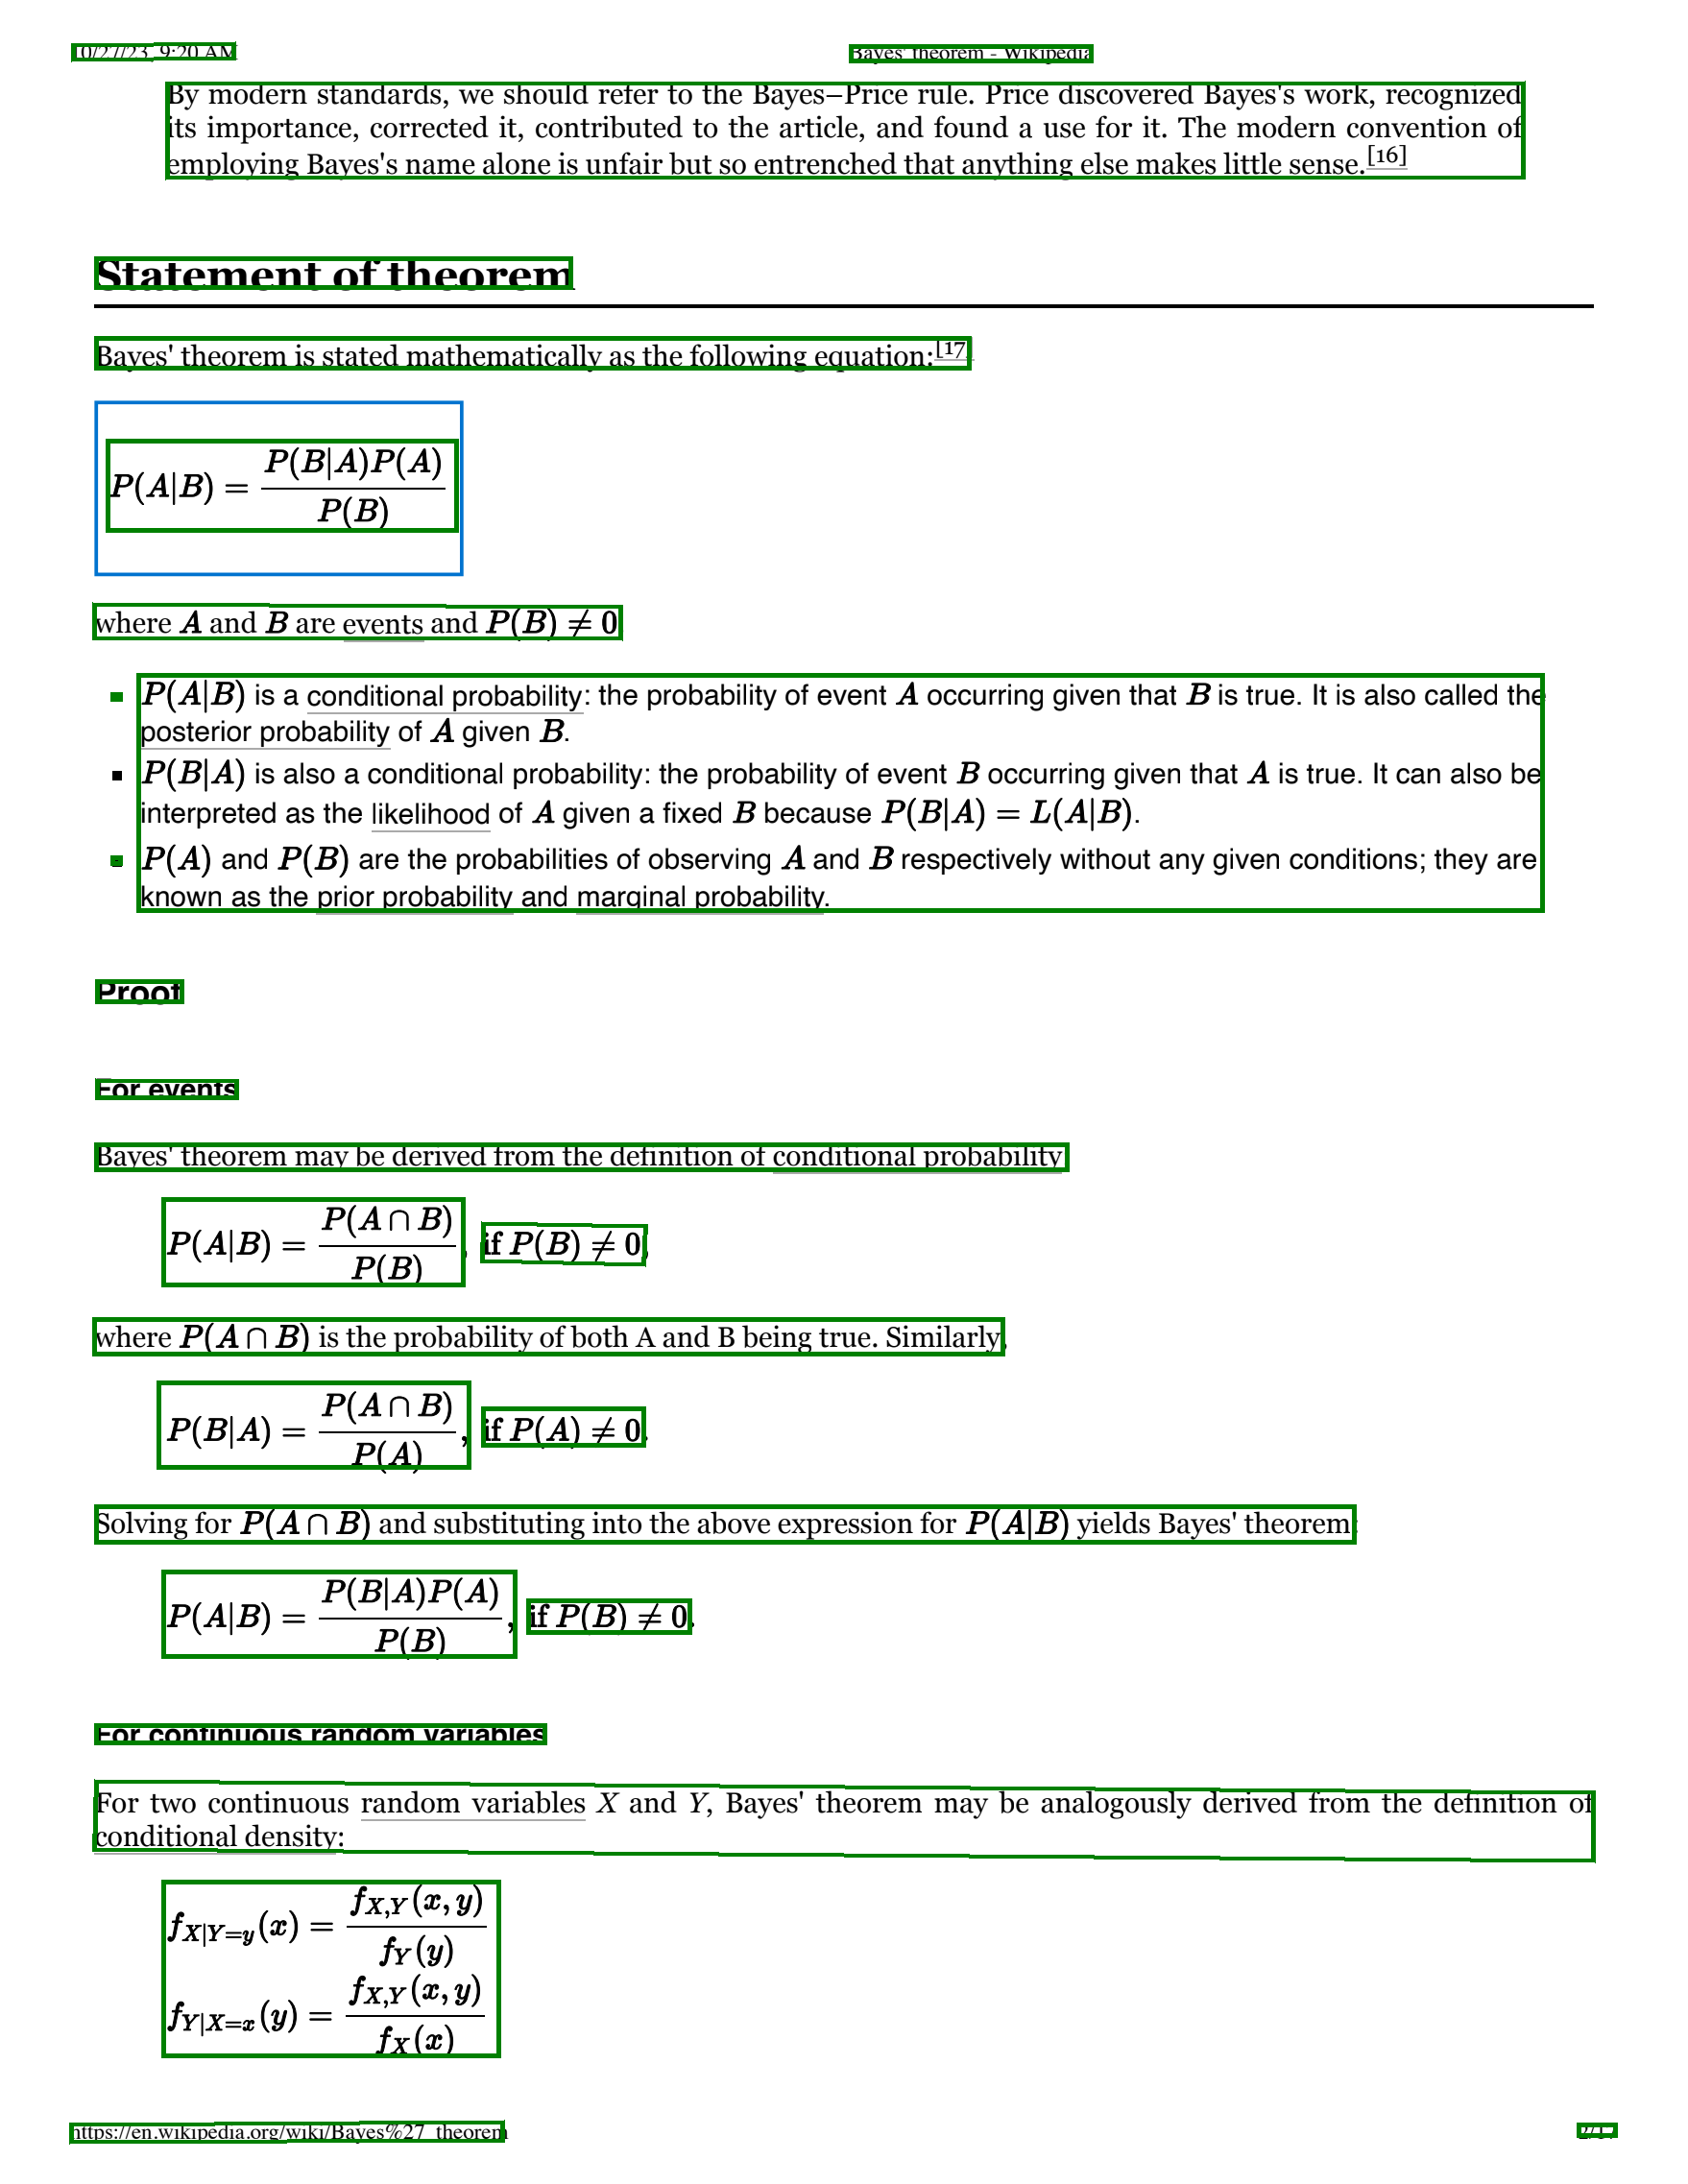

In [122]:
annotator(image, page.paragraphs)

In [123]:
for p, part in enumerate(paragraphs):
    print(f'{p} -------------------------------------------------------------------:\n{part}')

0 -------------------------------------------------------------------:
10/27/23, 9:20 AM

1 -------------------------------------------------------------------:
Bayes
' 
theorem - Wikipedia

2 -------------------------------------------------------------------:
By modern standards, we should refer to the Bayes-Price rule. Price discovered Bayes's work, recognized
its importance, corrected it, contributed to the article, and found a use for it. The modern convention of
employing Bayes's name alone is unfair but so entrenched that anything else makes little sense. [16]

3 -------------------------------------------------------------------:
Statement of theorem

4 -------------------------------------------------------------------:
Bayes' theorem is stated mathematically as the following equation:[17]

5 -------------------------------------------------------------------:
P(A|B)=\frac{P(B|A)P(A)}{P(B)}

6 -------------------------------------------------------------------:
where A and B a

### Pages:Lines

- [documentai.Document.Page.Line](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.Line)

In [124]:
lines = extractor(page.lines)

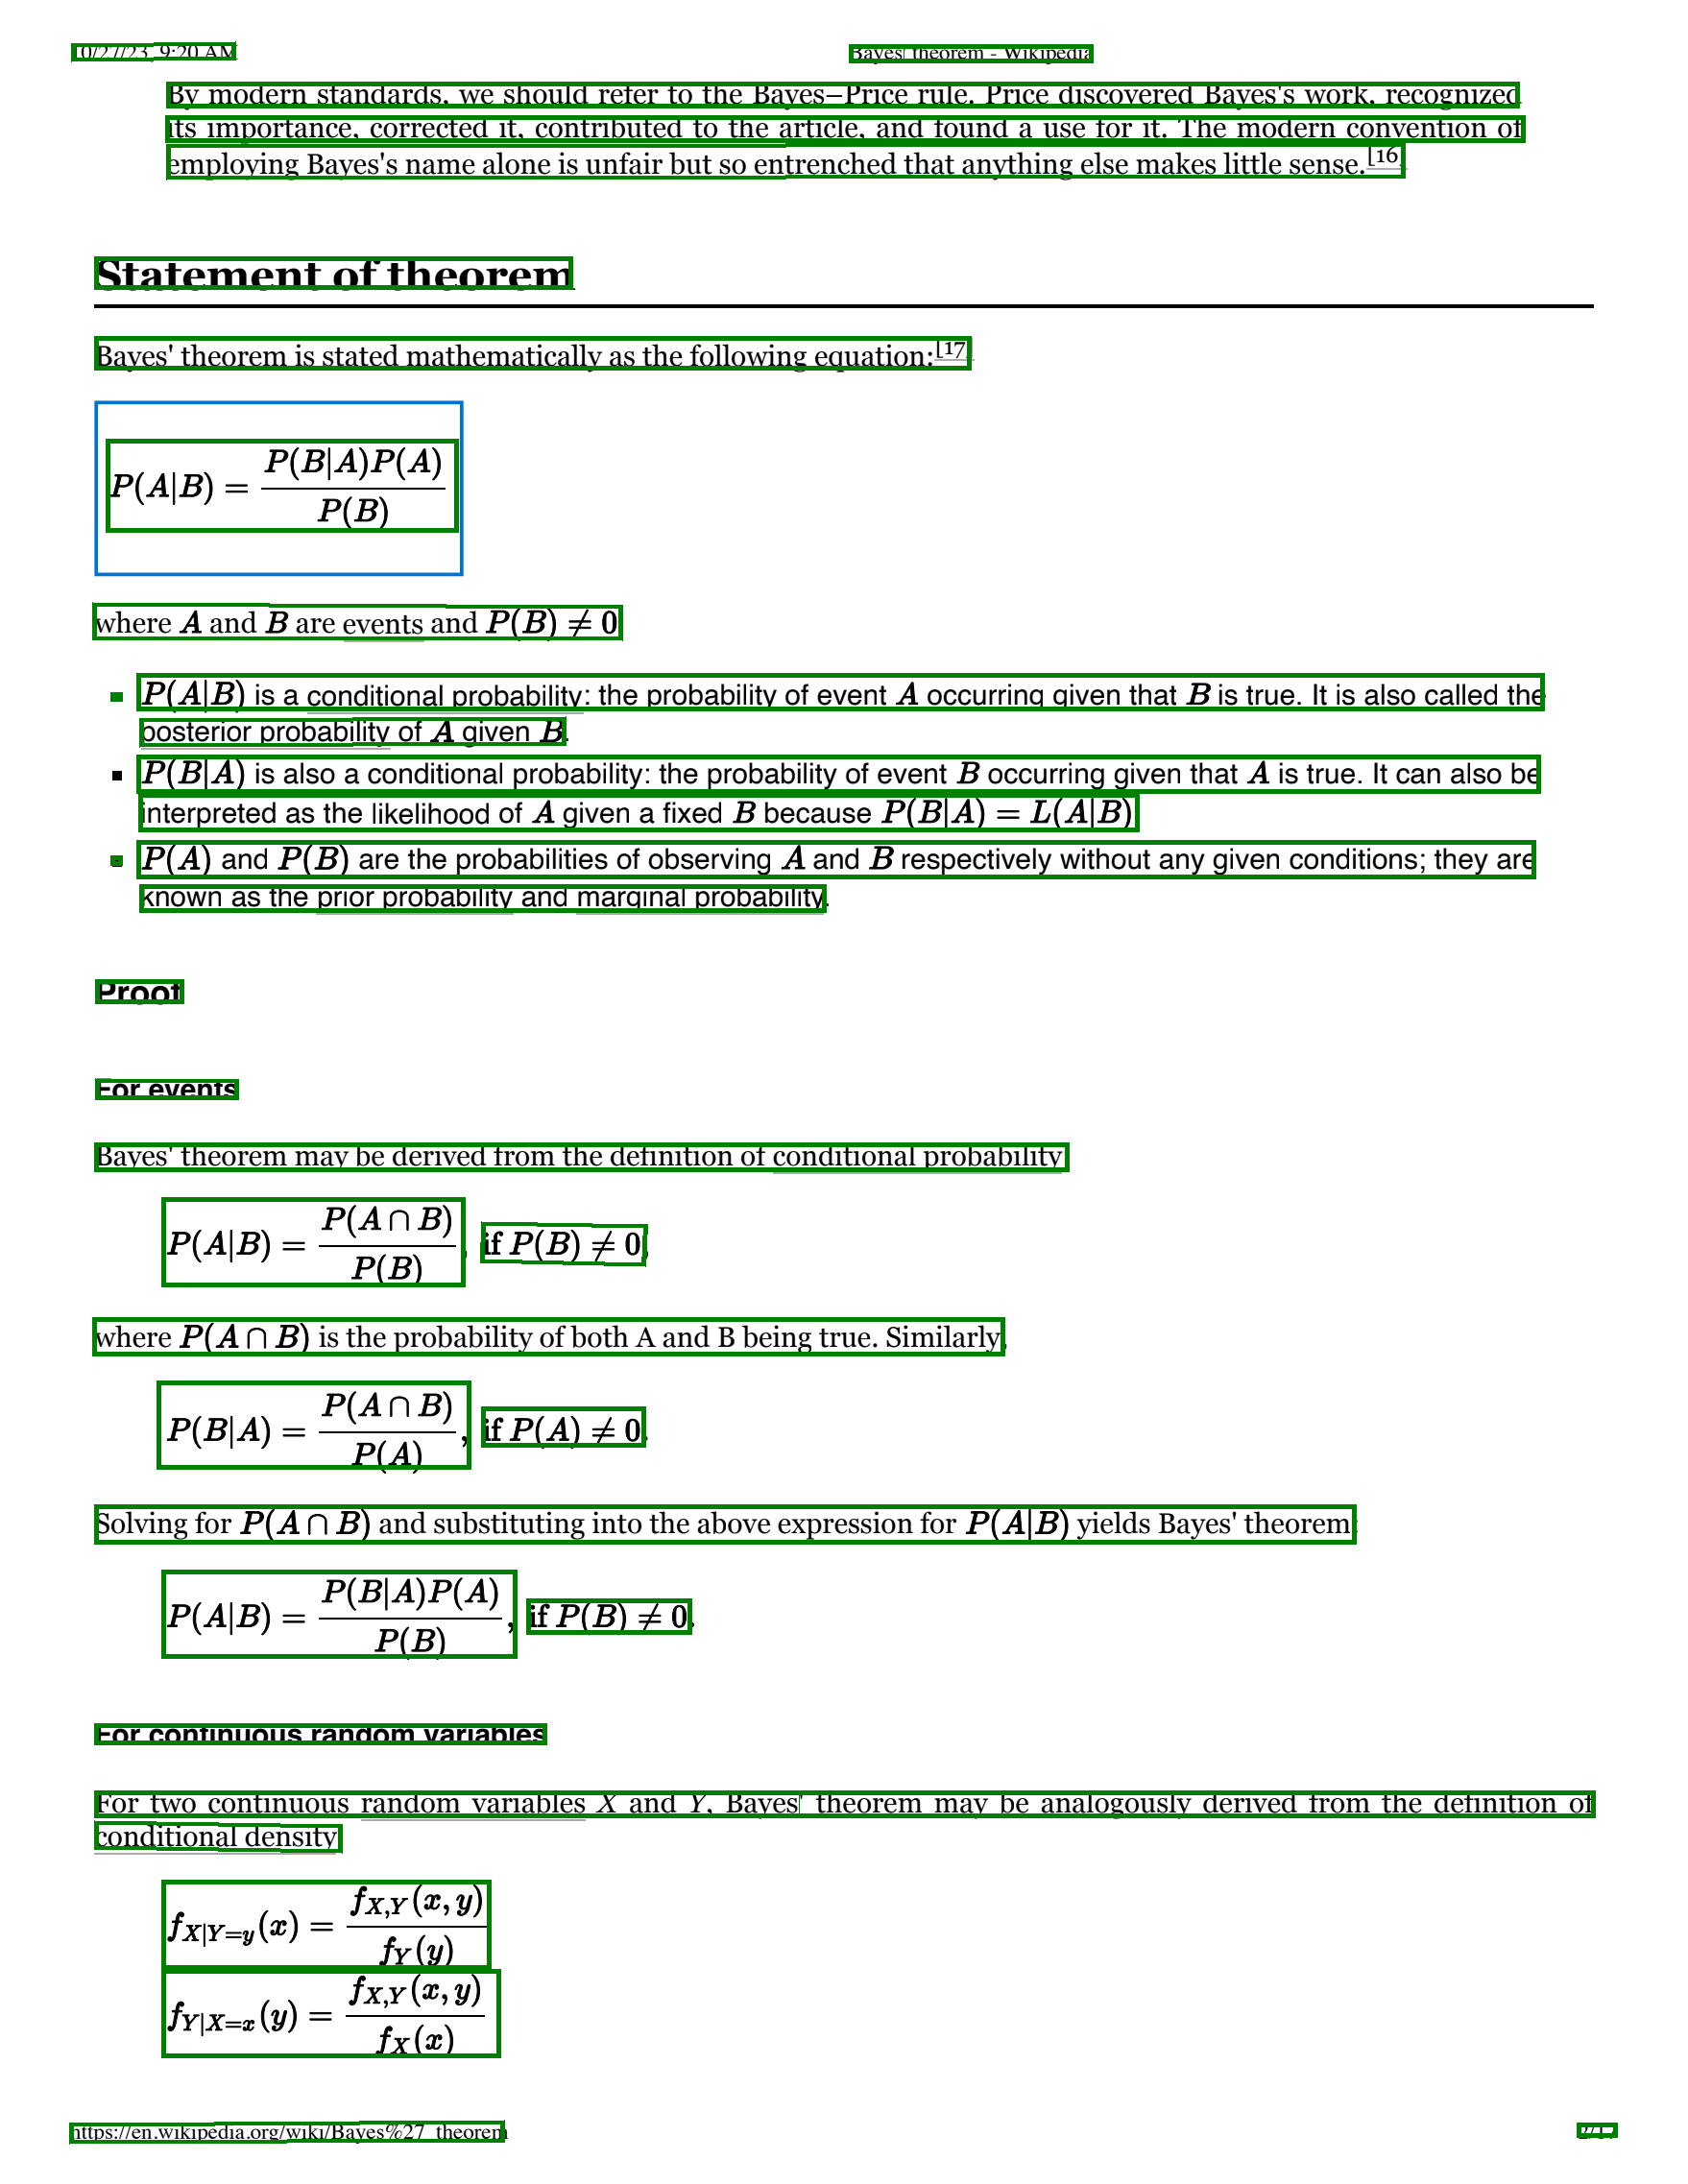

In [125]:
annotator(image, page.lines)

In [126]:
for p, part in enumerate(lines):
    print(f'{p} --------------------------------------: {part}')

0 --------------------------------------: 10/27/23, 9:20 AM

1 --------------------------------------: Bayes

2 --------------------------------------: ' 

3 --------------------------------------: theorem - Wikipedia

4 --------------------------------------: By modern standards, we should refer to the Bayes-Price rule. Price discovered Bayes's work, recognized

5 --------------------------------------: its importance, corrected it, contributed to the article, and found a use for it. The modern convention of

6 --------------------------------------: employing Bayes's name alone is unfair but so entrenched that anything else makes little sense. [16]

7 --------------------------------------: Statement of theorem

8 --------------------------------------: Bayes' theorem is stated mathematically as the following equation:[17]

9 --------------------------------------: P(A|B)=\frac{P(B|A)P(A)}{P(B)}

10 --------------------------------------: where A and B are events and P(B)\ne0 .

11 -

### Pages:Tokens

- [documentai.Document.Page.Token](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.Token)

In [127]:
tokens = extractor(page.tokens)

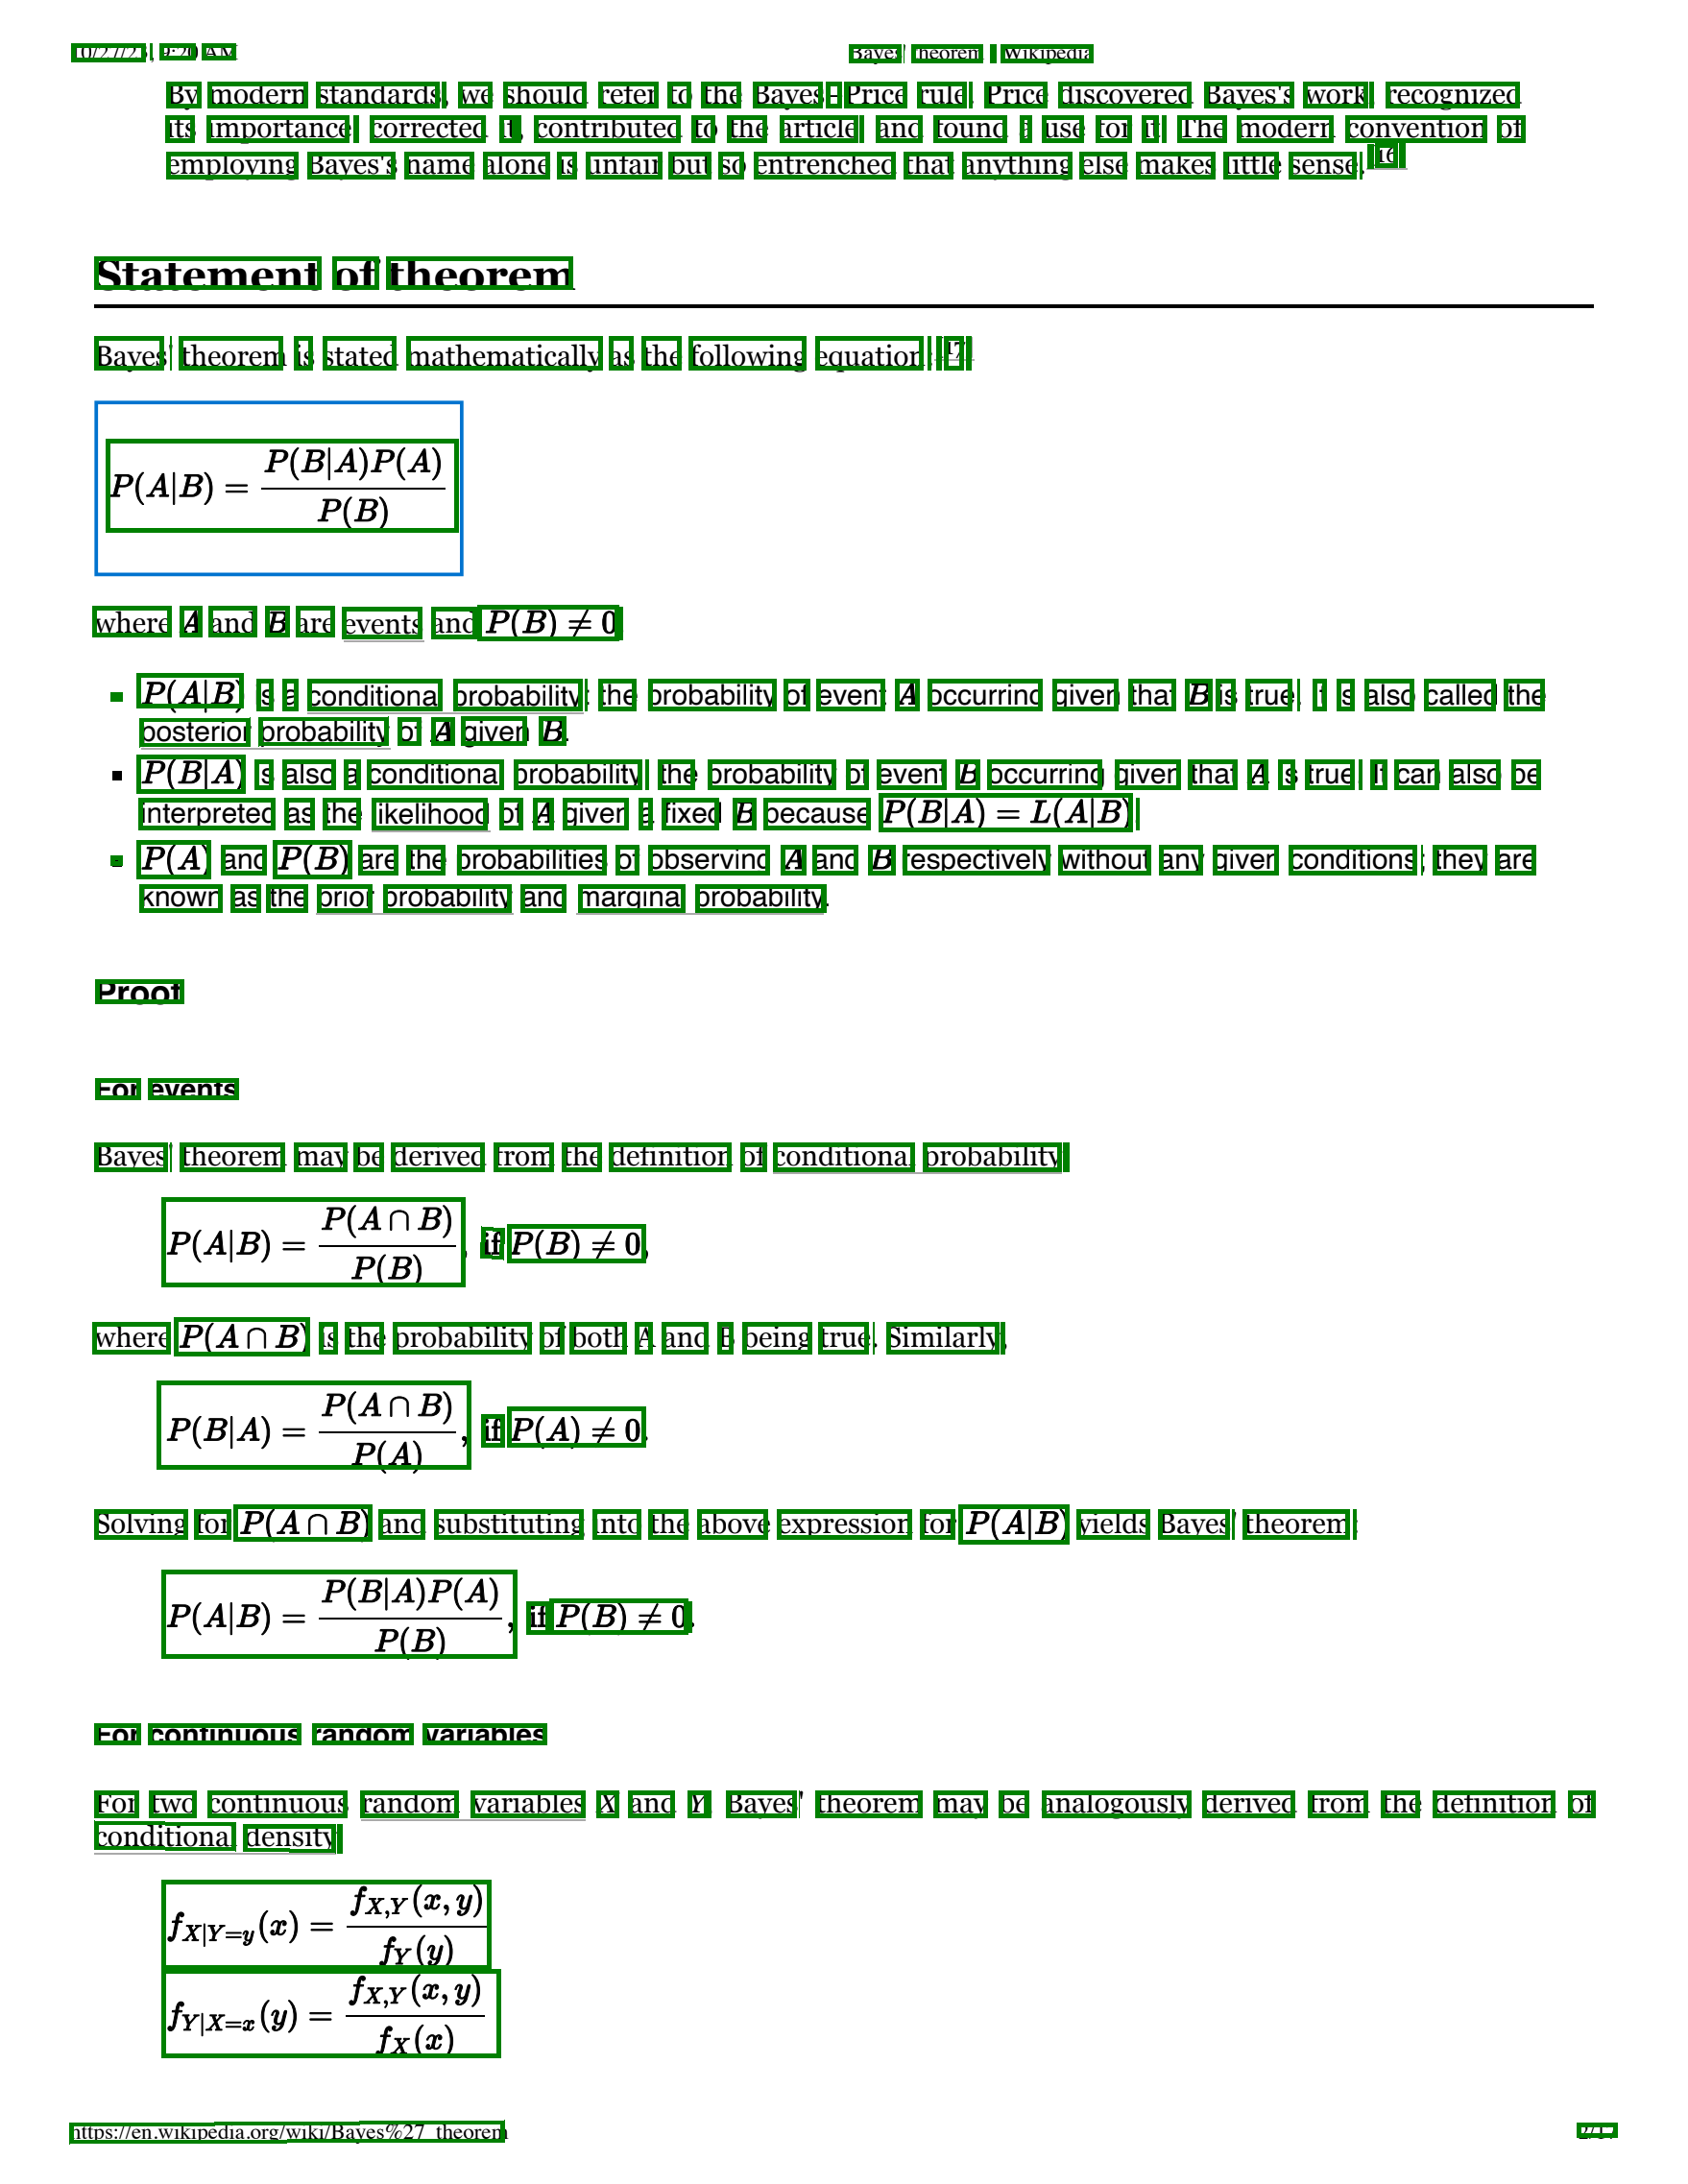

In [128]:
annotator(image, page.tokens)

In [129]:
for p, part in enumerate(tokens):
    if len(tokens) > 100:
        if p>50 and p<len(tokens)-50:
            continue
    print(f'{p} --------------------------------------: {part}')

0 --------------------------------------: 10/27/23
1 --------------------------------------: , 
2 --------------------------------------: 9:20 
3 --------------------------------------: AM

4 --------------------------------------: Bayes

5 --------------------------------------: ' 

6 --------------------------------------: theorem 
7 --------------------------------------: - 
8 --------------------------------------: Wikipedia

9 --------------------------------------: By 
10 --------------------------------------: modern 
11 --------------------------------------: standards
12 --------------------------------------: , 
13 --------------------------------------: we 
14 --------------------------------------: should 
15 --------------------------------------: refer 
16 --------------------------------------: to 
17 --------------------------------------: the 
18 --------------------------------------: Bayes
19 --------------------------------------: -
20 ------------------------------

### Pages:Symbols

- [documentai.Document.Page.Symbol](https://cloud.google.com/python/docs/reference/documentai/latest/google.cloud.documentai_v1.types.Document.Page.Symbol)

In [130]:
symbols = extractor(page.symbols)

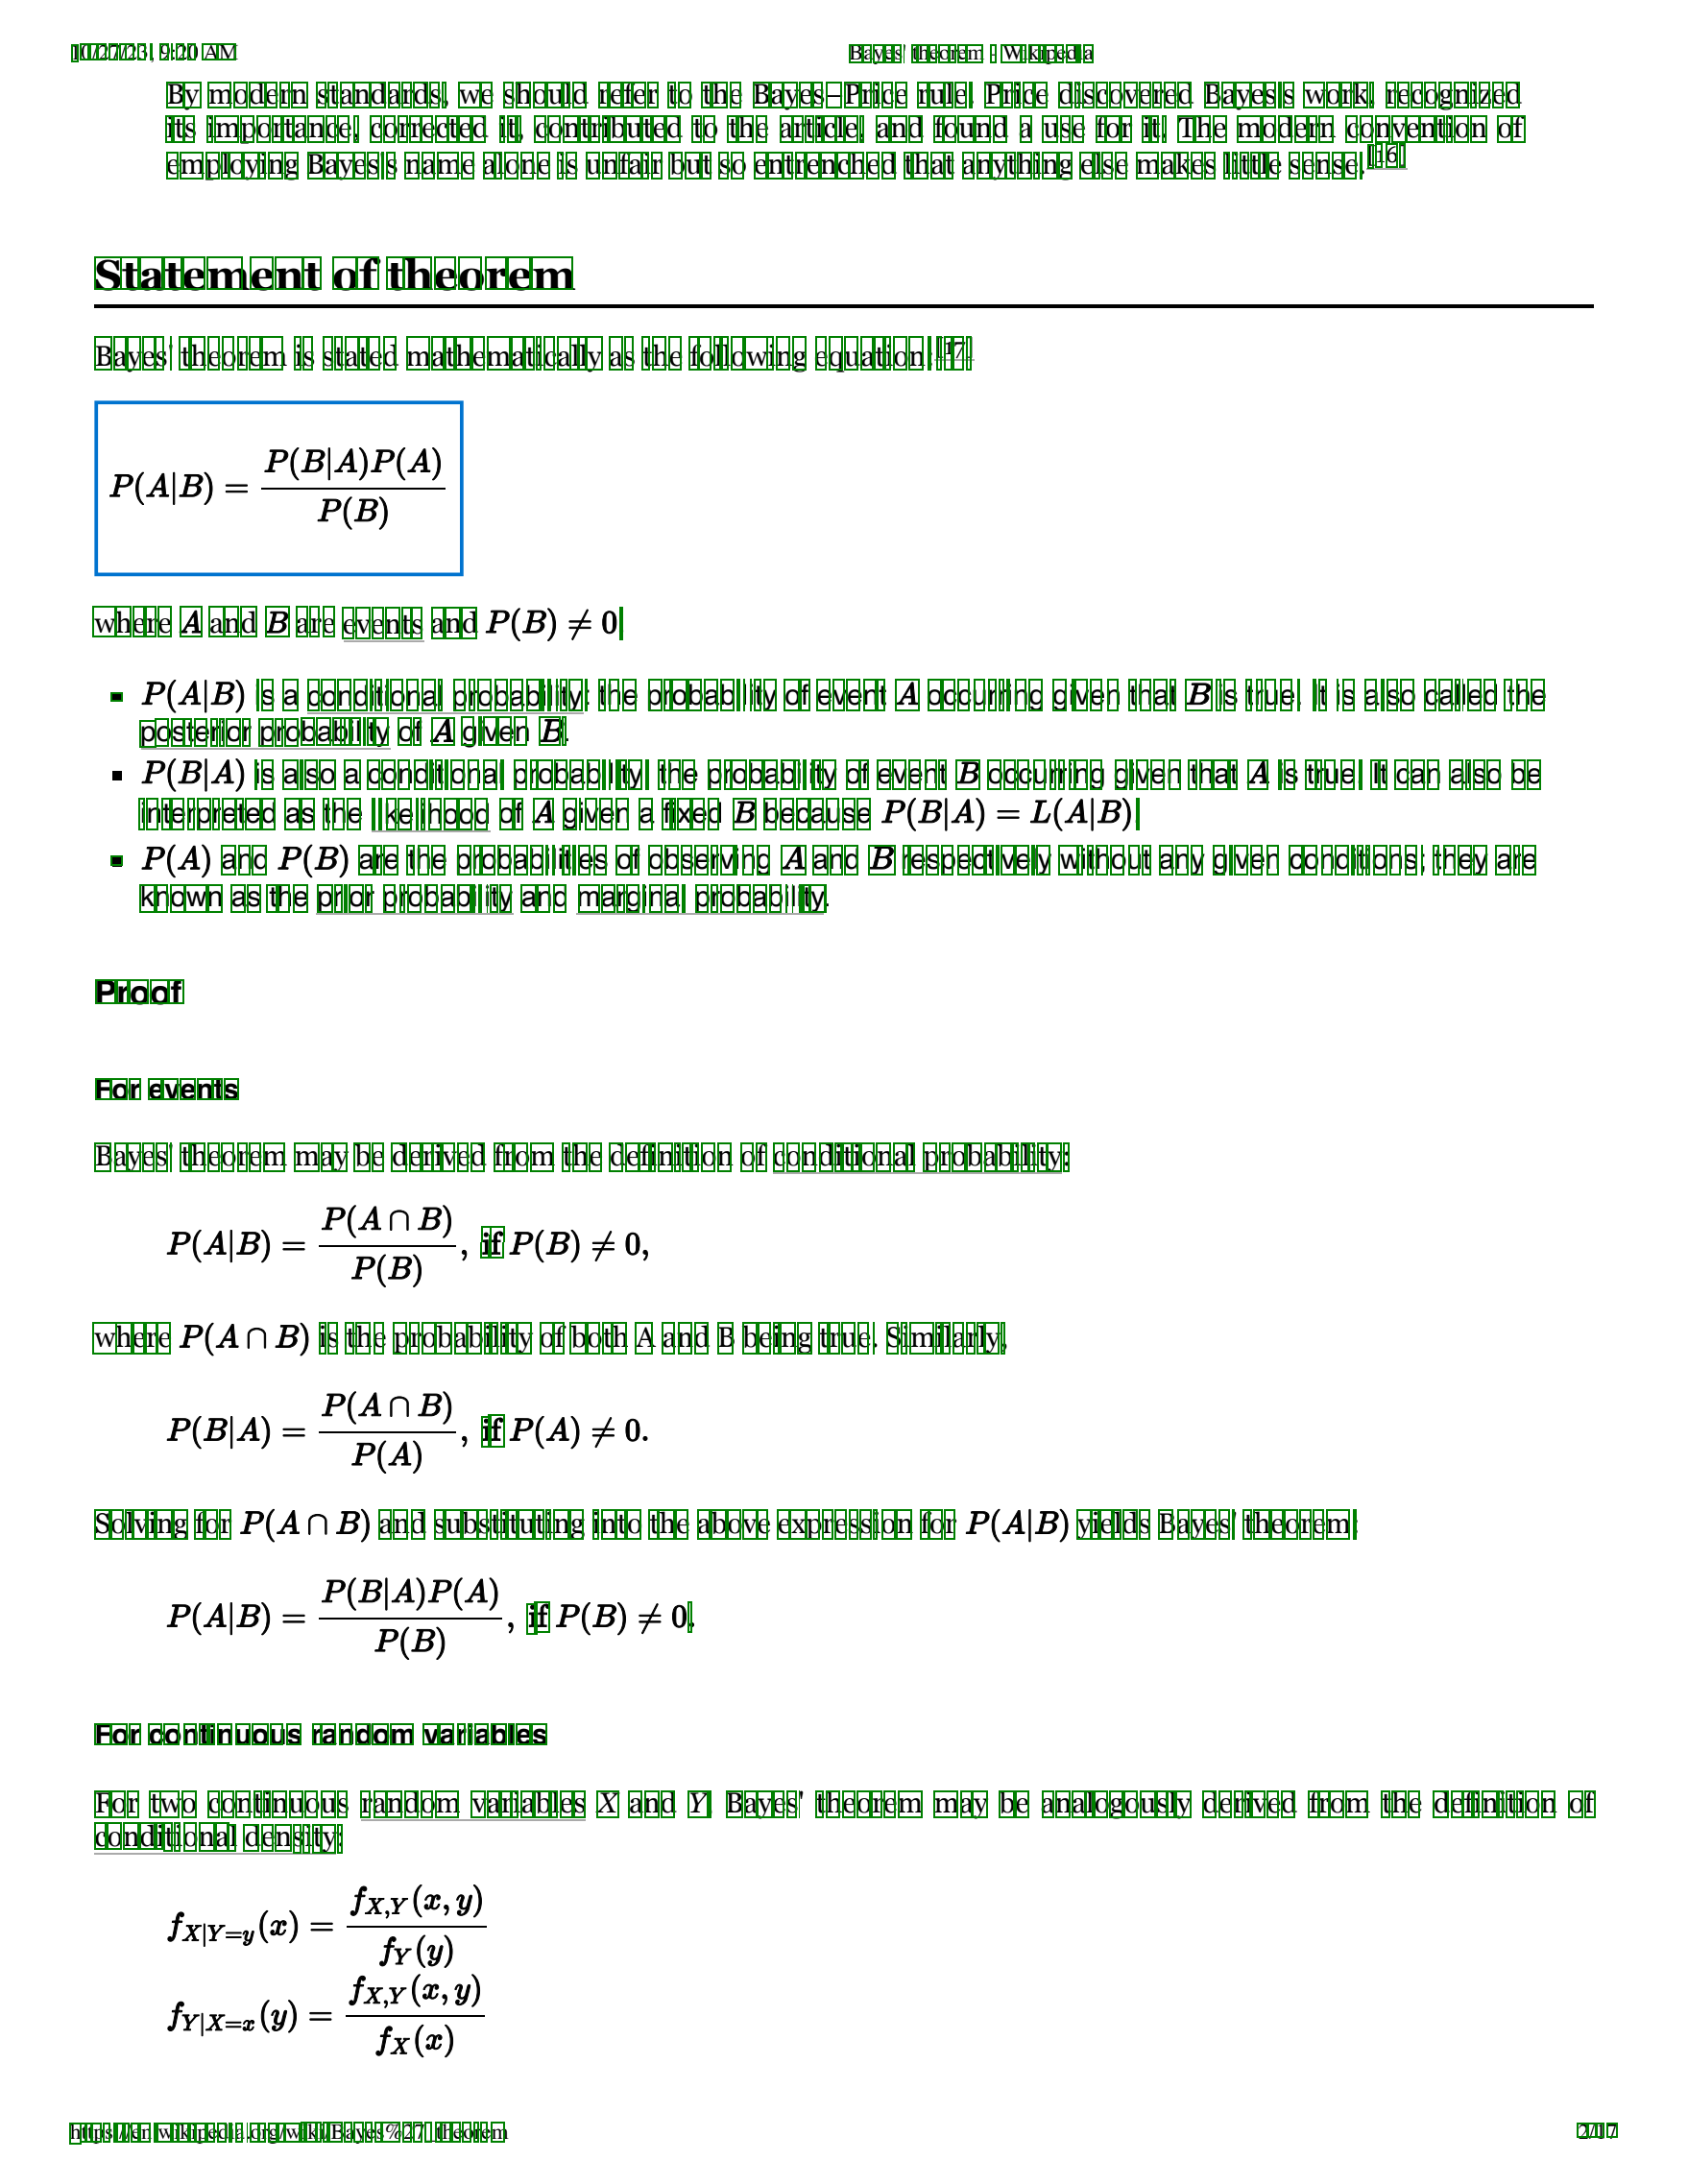

In [131]:
annotator(image, page.symbols, line_size = 2)

In [132]:
for p, part in enumerate(symbols):
    if len(symbols) > 100:
        if p>50 and p<len(symbols)-50:
            continue
    print(f'{p} --------------------------------------: {part}')

0 --------------------------------------: 1
1 --------------------------------------: 0
2 --------------------------------------: /
3 --------------------------------------: 2
4 --------------------------------------: 7
5 --------------------------------------: /
6 --------------------------------------: 2
7 --------------------------------------: 3
8 --------------------------------------: ,
9 --------------------------------------: 9
10 --------------------------------------: :
11 --------------------------------------: 2
12 --------------------------------------: 0
13 --------------------------------------: A
14 --------------------------------------: M
15 --------------------------------------: B
16 --------------------------------------: a
17 --------------------------------------: y
18 --------------------------------------: e
19 --------------------------------------: s
20 --------------------------------------: '
21 --------------------------------------: t
22 -----------------

### Entities

Entities are extracted key:value pairs from the overall document.  Each parser has specific entities it is trained to detect and return.  In this case, the OCR Parser, there are not any default entities detected, however, the processing request included a `process_options` setting for `enable_image_quality_scores = True` that includes entities related to image quality for the document.

```
        process_options = documentai.ProcessOptions(
            from_start = 5,
            ocr_config = documentai.OcrConfig(
                enable_symbol = True,
                enable_image_quality_scores = True,
                premium_features = documentai.OcrConfig.PremiumFeatures(
                    compute_style_info = True
                )
```

In [133]:
len(response.document.entities)

5

In [134]:
response.document.entities[0]

type_: "quality_score"
confidence: 0.8906835317611694
page_anchor {
  page_refs {
  }
}
properties {
  type_: "quality/defect_document_cutoff"
  confidence: 1.0
}
properties {
  type_: "quality/defect_glare"
  confidence: 0.6065088510513306
}
properties {
  type_: "quality/defect_text_cutoff"
  confidence: 0.5
}

In [135]:
for entity in response.document.entities:
    try:
        pn = entity.page_anchor.page_refs[0].page
    except:
        pn = 0
    print('page ', pn, entity.type_, entity.confidence)
    if entity.properties:
        for property in entity.properties:
            print('\t', property.type_, property.confidence)

page  0 quality_score 0.8906835317611694
	 quality/defect_document_cutoff 1.0
	 quality/defect_glare 0.6065088510513306
	 quality/defect_text_cutoff 0.5
page  1 quality_score 0.9387601613998413
	 quality/defect_document_cutoff 1.0
	 quality/defect_glare 0.6258635520935059
	 quality/defect_text_cutoff 0.5
page  2 quality_score 0.8564859628677368
	 quality/defect_document_cutoff 1.0
	 quality/defect_glare 0.6462531089782715
	 quality/defect_text_cutoff 0.5
page  3 quality_score 0.9343112707138062
	 quality/defect_document_cutoff 1.0
	 quality/defect_glare 0.632520854473114
	 quality/defect_text_cutoff 0.5
page  4 quality_score 0.9484705328941345
	 quality/defect_document_cutoff 1.0
	 quality/defect_glare 0.6405333876609802
	 quality/defect_text_cutoff 0.5
